In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
#choose the model to plot
model_name = 'adc'

#choose the SNR values to plot
SNR = (10,20,30,40,50)

#choose the n_train of the simulations to plot
n_train = 1000

#choose the designs to plot
designs = ("super","crlb","jofsto")

#choose the fits to plot
fits = ("super","crlb","jofsto_lsq","jofsto_nn")

#neat names for each fit for the plots
fits_neat = ("Super design","CRLB","JOFSTO","JOFSTO NN")

#Directories and filenames to load/save data (Replace with location of JOFSTO code - possible to get this automatically?)
basedir = '/Users/paddyslator/python/ED_MRI/'

#sub directory where the signals/fits are located
sim_basename = os.path.join(basedir, 'output', model_name + '_simulations', model_name + '_simulations_')

#define location to save figures
fig_dir = os.path.join(basedir,'figures')
# Check whether a path for this model exists or not - if not create it
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    
#base filename for saving figures    
fig_basename = model_name + '_simulations_n_train_' + str(n_train) 



In [3]:
#load the data into dictionaries

signals = {}
fitted_parameters = {}
gt_parameters = {}

for i in SNR:
    signals[i] = {}
    fitted_parameters[i] = {}
    gt_parameters[i] = {}
    
    for des in designs:
        signals_filename = sim_basename + 'n_train_' + str(n_train) + '_SNR_' + str(i) + '_signals_' + des + '.npy'
        signals[i][des] = np.load(signals_filename)

    for fit in fits:
        fit_filename = sim_basename + 'n_train_' + str(n_train) + '_SNR_' + str(i) + '_fit_' + fit + '.npy'        
        fitted_parameters[i][fit] = np.load(fit_filename)
    
    #ground truth parameters
    gt_parameters_filename = sim_basename + 'n_train_' + str(n_train) + '_SNR_' + str(i) + '_parameters_gt.npy'
    gt_parameters[i] = np.load(gt_parameters_filename)
    




In [4]:
#define some helper functions

def mean_squared_error(x,y):
    return ((x - y)**2).mean(axis=0)

def calculate_mean_bias(gt,pred):
    return np.mean(gt - pred)
    
def calculate_variance(gt,pred):
    return (np.std(gt - pred))**2

def calculate_bias(gt,pred):
    return gt - pred

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


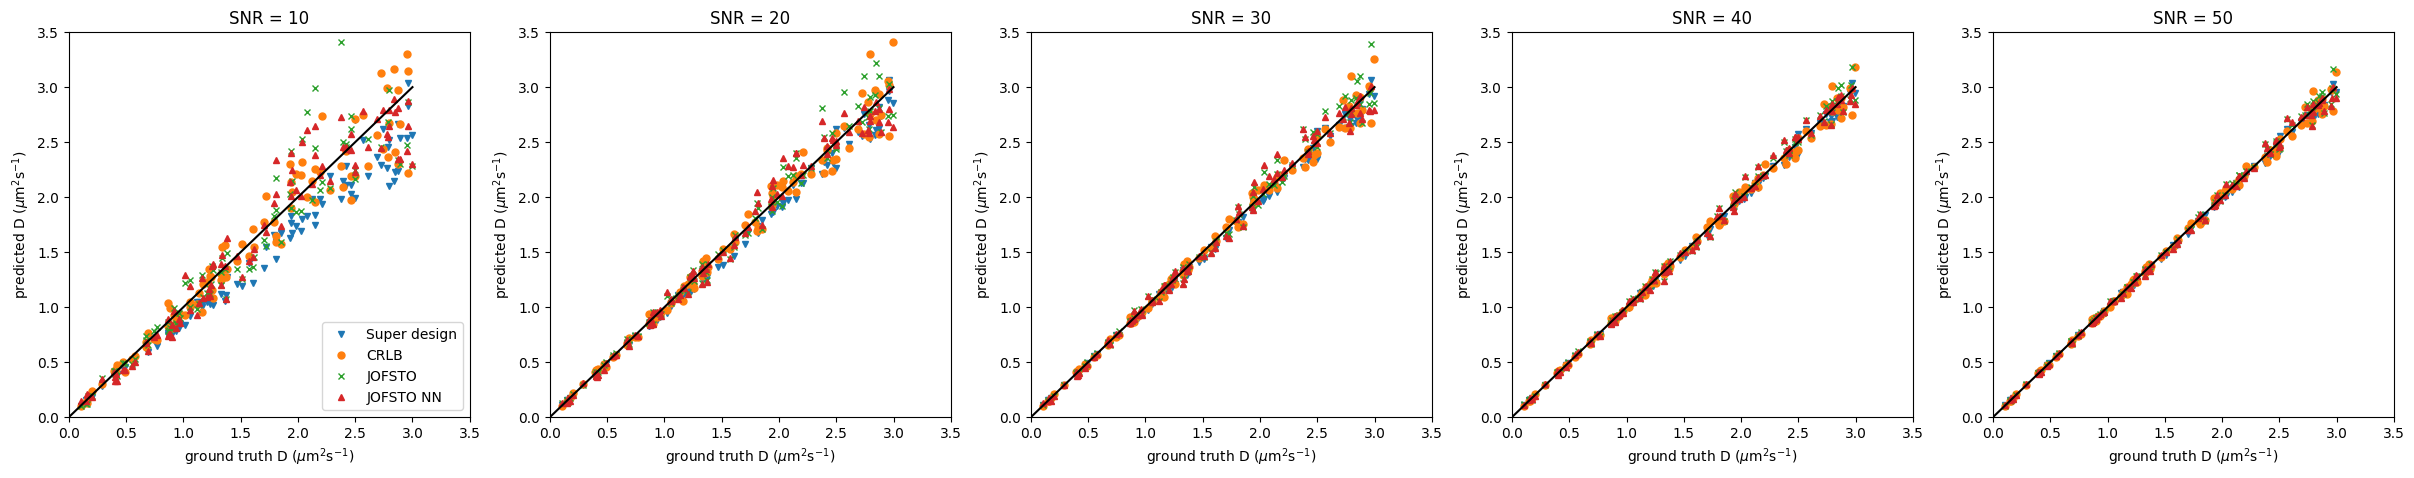

In [5]:
#plot the ground truth parameters against fitted parameters


fig, ax = plt.subplots(1, len(SNR), figsize=[6*len(SNR), 5])

markers = ('v','o','x','^')

for (i,j) in zip(SNR,range(0,len(SNR))):
    for (fit,k) in zip(fits,range(0,len(fits))):
        ax[j].plot(gt_parameters[i],fitted_parameters[i][fit],markers[k],markersize=5)
        ax[j].set_title('SNR = ' + str(i))
#     ax[j].plot(gt_parameters[i],fitted_parameters_crlb,'o',markersize=5)
#     ax[j].plot(gt_parameters[i],fitted_parameters_jofsto,'x',markersize=10)
#     ax[j].plot(test_tar,JOFSTO_output[12]["test_output"][:,0],'^')

    if model_name == 'adc':
        ax[j].plot((0,3),(0,3),'k',markersize=5)
        ax[j].set_xlabel('ground truth D ($\mu$m$^2$s$^{-1}$)')
        ax[j].set_ylabel('predicted D ($\mu$m$^2$s$^{-1}$)')

        ax[j].set_ylim([0,3.5])
        ax[j].set_xlim([0,3.5])


    elif model_name == 't1inv':
        ax[j].plot((0,7),(0,7),'k',markersize=5)

        ax[j].set_xlabel('ground truth T1 ($s$)')
        ax[j].set_ylabel('predicted T1 ($s$)')

        ax[j].set_ylim([0,7.5])
        ax[j].set_xlim([0,7.5])


ax[0].legend(fits_neat)


fig.savefig(os.path.join(fig_dir,fig_basename + '_gt_v_est.png'))
fig.savefig(os.path.join(fig_dir,fig_basename + '_gt_v_est.eps'))
fig.savefig(os.path.join(fig_dir,fig_basename + '_gt_v_est.pdf'))


In [6]:
#calculate some metrics
MSE = {}
mean_bias = {}
bias = {}
mean_variance = {}

for fit in fits:
    MSE[fit] = {}
    mean_bias[fit] = {}
    bias[fit] = {}
    mean_variance[fit] = {}
    for i in SNR:
        MSE[fit][i] = mean_squared_error(gt_parameters[i],fitted_parameters[i][fit])
        MSE[fit][i] = mean_squared_error(gt_parameters[i],fitted_parameters[i][fit])
        MSE[fit][i] = mean_squared_error(gt_parameters[i],fitted_parameters[i][fit])
        MSE[fit][i] = mean_squared_error(gt_parameters[i],fitted_parameters[i][fit])

        mean_bias[fit][i] = calculate_mean_bias(gt_parameters[i],fitted_parameters[i][fit])
        mean_bias[fit][i] = calculate_mean_bias(gt_parameters[i],fitted_parameters[i][fit])
        mean_bias[fit][i] = calculate_mean_bias(gt_parameters[i],fitted_parameters[i][fit])
        mean_bias[fit][i] = calculate_mean_bias(gt_parameters[i],fitted_parameters[i][fit])

        bias[fit][i] = calculate_bias(gt_parameters[i],fitted_parameters[i][fit])
        bias[fit][i] = calculate_bias(gt_parameters[i],fitted_parameters[i][fit])
        bias[fit][i] = calculate_bias(gt_parameters[i],fitted_parameters[i][fit])
        bias[fit][i] = calculate_bias(gt_parameters[i],fitted_parameters[i][fit])
        
        mean_variance[fit][i] = calculate_variance(gt_parameters[i],fitted_parameters[i][fit])
        mean_variance[fit][i] = calculate_variance(gt_parameters[i],fitted_parameters[i][fit])
        mean_variance[fit][i] = calculate_variance(gt_parameters[i],fitted_parameters[i][fit])
        mean_variance[fit][i] = calculate_variance(gt_parameters[i],fitted_parameters[i][fit])
        
        


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


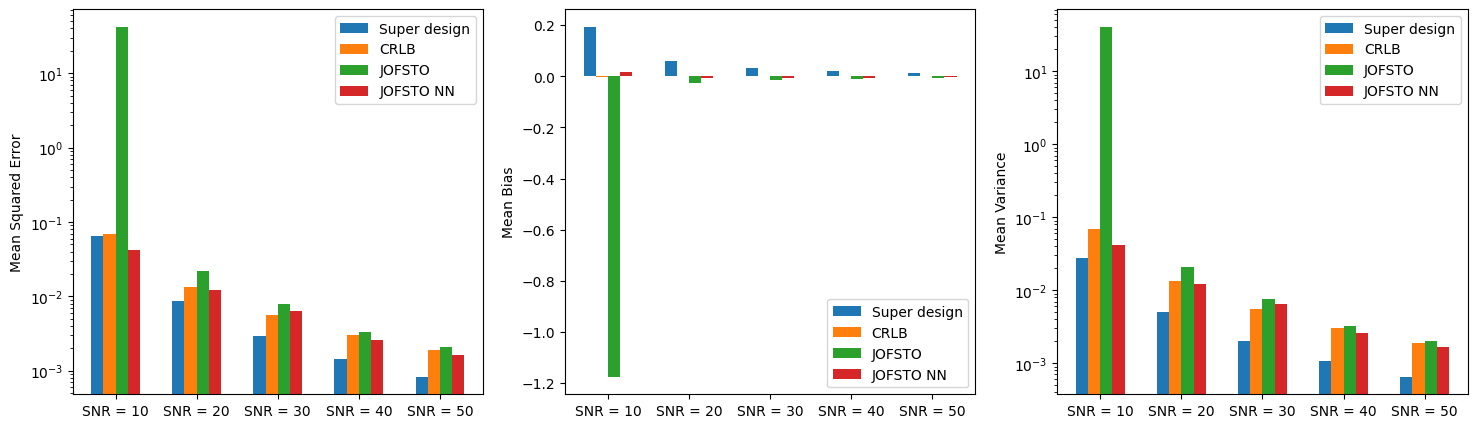

In [7]:
#barplot of MSE, mean bias and mean variance

n_plots = 3

fig, axs = plt.subplots(1, n_plots, figsize=[6*n_plots, 5])

bar_width = 0.15

nbars = len(SNR)

i=SNR[0]

bars = np.arange(nbars)

MSE_bars={}
mean_bias_bars={}
mean_variance_bars={}


for (fit,k) in zip(fits,range(0,len(fits))):
    MSE_bars[fit] = [x + k * bar_width for x in bars]                    
    mean_bias_bars[fit] = [x + k * bar_width for x in bars]
    mean_variance_bars[fit] = [x + k * bar_width for x in bars]
    
    
for fit in fits:
    axs[0].bar(MSE_bars[fit], MSE[fit].values(),width=bar_width)
    axs[1].bar(mean_bias_bars[fit], mean_bias[fit].values(),width=bar_width)
    axs[2].bar(mean_variance_bars[fit], mean_variance[fit].values(),width=bar_width)


axs[0].set_ylabel('Mean Squared Error')
axs[1].set_ylabel('Mean Bias') #mean(gt - pred)
axs[2].set_ylabel('Mean Variance') # std(gt - pred)^2


SNRticks = []
for i in SNR:
    SNRticks.append('SNR = ' + str(i))

for n in range(0,n_plots):
    axs[n].set_xticklabels('')
    axs[n].set_xticks([r + 1.5*bar_width for r in range(nbars)])
    axs[n].set_xticklabels(SNRticks)
    axs[n].legend(fits_neat)

    
axs[0].set_yscale('log')
axs[2].set_yscale('log')


fig.savefig(os.path.join(fig_dir,fig_basename + '_metrics_barplot.png'))
fig.savefig(os.path.join(fig_dir,fig_basename + '_metrics_barplot.eps'))
fig.savefig(os.path.join(fig_dir,fig_basename + '_metrics_barplot.pdf'))







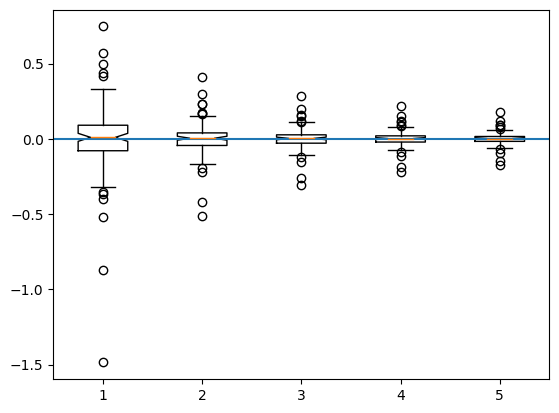

In [8]:
#TO DO (maybe): PLOT BOXPLOTS OF THE BIAS
plt.boxplot(bias['crlb'].values(),1)
plt.plot([0.5,5.5],[0,0])